In [3]:
%matplotlib inline

In [21]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [22]:
timeseries_tests = pd.DataFrame(requests.get("https://covidtracking.com/api/states/daily").json())
timeseries_tests['stateName'] = timeseries_tests.state
timeseries_tests['dateColumn'] = pd.to_datetime(timeseries_tests.dateChecked)
timeseries_tests = timeseries_tests.sort_values('dateColumn')

In [23]:
grouped_timeseries = timeseries_tests.groupby(['state', 'dateChecked']).min()
grouped_timeseries['positive_ratio'] = grouped_timeseries.positive / grouped_timeseries.total

In [55]:
_states = {
    'FL': 'green',
    'NY': 'red',
    'CA': 'yellow',
    'WA': 'blue',
    'MD': 'orange',
    'NJ': 'cyan'
}

In [93]:
import numpy as np
import pandas as pd

millis_per_day = 60*60*24*1000*1000*1000
def get_dataset_doubling_period(dataset) -> float:
    dataset = dataset[(dataset > 0) & (dataset < np.inf)]
    return np.polyfit(
        np.log(dataset),
        (
            pd.to_datetime(dataset.index) - pd.to_datetime("Jan 1 2020", utc=True)
        ).astype(int) / millis_per_day, 1
    )

In [96]:
def plot_states(states: List[str] = None, legend: List[str] = False, data_src = None, plot_key="positive"):
    data_src = data_src if data_src else grouped_timeseries
    states = states if states else grouped_timeseries.stateName.unique()
    with plt.style.context("fivethirtyeight"):
        fig_scale = 2
        plt.figure(figsize=(8*fig_scale, 5*fig_scale))
        for state in states:
            in_legend = (legend is True or (isinstance(legend, list) and state in legend))
            state_data = data_src.loc[state, :]
            state_data = state_data[state_data[plot_key] > 0]
            if in_legend:
                plt.plot(
                    state_data.dateColumn, 
                    state_data[plot_key], 
                    label=f"{state} ($T_d$ = {np.round(get_dataset_doubling_period(state_data.positive)[0], 2)})",
                    c=_states[state] if state in _states else '#000000'
                )
            else:
                plt.plot(
                    state_data.dateColumn, 
                    state_data[plot_key], 
                    label=None,
                    color="#000000", alpha=0.02
                )
        plt.legend()
        plt.title("Total Confirmed Cases per State")
        plt.ylabel("Confirmed Cases")
        plt.xlabel("Date")

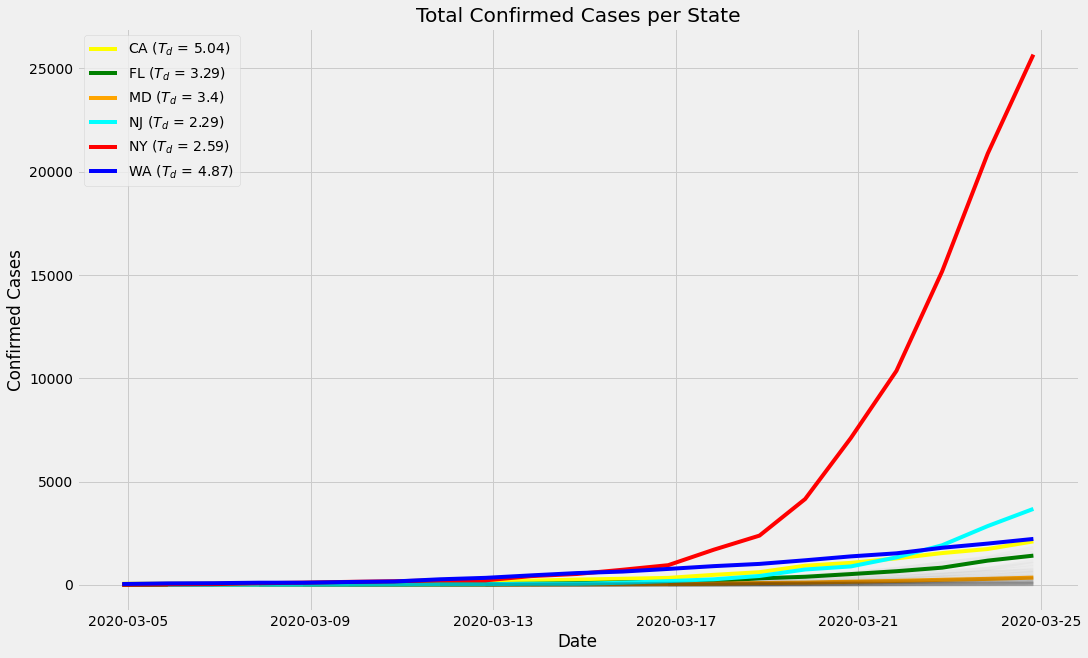

In [97]:
plot_states(legend=list(_states.keys()), plot_key="positive")